In [151]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [152]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [153]:
datatest = pd.read_csv('/kaggle/input/titanic/test.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
print(data.isnull().sum())
print(datatest.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [155]:
data['Age'] = data['Age'].replace(np.NaN, data['Age'].mean())
datatest['Age'] = datatest['Age'].replace(np.NaN, data['Age'].mean())
print(data["Age"].isnull().sum())
print(datatest["Age"].isnull().sum())

0
0


In [156]:
datatest['Fare'] = datatest['Fare'].replace(np.NaN, data['Fare'].mean())
datatest['Fare'].isnull().sum()

0

In [157]:
#data['Cabin'].dtype
#data['Cabin'] = data['Cabin'].fillna('U')
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
val = [data, datatest]

for dataset in val:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
data = data.drop(['Cabin'], axis=1)
datatest = datatest.drop(['Cabin'], axis=1)

In [158]:
data['Embarked'] = data['Embarked'].fillna('S')
datatest['Embarked'] = data['Embarked'].fillna('S')
print(datatest.isnull().sum())
print(data.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Deck           0
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Deck           0
dtype: int64


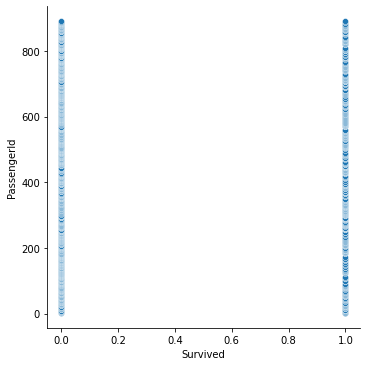

In [159]:
import seaborn as sns
sns.relplot(x='Survived', y='PassengerId',data=data)

In [160]:
#Name feature to float to work with
val = [data, datatest]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in val:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
data = data.drop(['Name'], axis=1)
datatest = datatest.drop(['Name'], axis=1)
#print(data['Title'].head())
#print(datatest['Title'].head())

In [161]:
n=0
data['Sex'] = data['Sex'].replace('male', n)
n=1
data['Sex'] = data['Sex'].replace('female', n)
print(data['Sex'].head())
m=0
datatest['Sex'] = datatest['Sex'].replace('male', m)
m=1
datatest['Sex'] = datatest['Sex'].replace('female', m)
print(datatest['Sex'].head())

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64
0    0
1    1
2    0
3    0
4    1
Name: Sex, dtype: int64


In [162]:
#drop Ticket
data = data.drop(['Ticket'], axis=1)
datatest = datatest.drop(['Ticket'], axis=1)

In [163]:
#Embarked into numerical
ports = {"S": 0, "C": 1, "Q": 2}
val = [data, datatest]

for dataset in val:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [164]:
print(data['Embarked'].head())
datatest['Embarked'].head()

0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64


0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64

In [165]:
#create categories ie cnvrt age to agegrp
val = [data, datatest]
for dataset in val:
    #dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [166]:
print(data['Age'].head())
print(datatest['Age'].head())

0    2.0
1    5.0
2    3.0
3    5.0
4    5.0
Name: Age, dtype: float64
0    5.0
1    6.0
2    6.0
3    3.0
4    2.0
Name: Age, dtype: float64


In [167]:
print(data.head())
print(datatest.head())

   PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked  \
0            1         0       3    0  2.0      1      0   7.2500         0   
1            2         1       1    1  5.0      1      0  71.2833         1   
2            3         1       3    1  3.0      0      0   7.9250         0   
3            4         1       1    1  5.0      1      0  53.1000         0   
4            5         0       3    0  5.0      0      0   8.0500         0   

   Deck  Title  
0     8      1  
1     3      3  
2     8      2  
3     3      3  
4     8      1  
   PassengerId  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked  Deck  Title
0          892       3    0  5.0      0      0   7.8292         0     8      1
1          893       3    1  6.0      1      0   7.0000         1     8      3
2          894       2    0  6.0      0      0   9.6875         0     8      1
3          895       3    0  3.0      0      0   8.6625         0     8      1
4          896       3    1 

In [168]:
#create categories ie fare
val = [data, datatest]

for dataset in val:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [169]:
#create new feature fr agegrp
val = [data, datatest]
for dataset in val:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [170]:
#datatest = datatest.drop(['PassengerId'], axis=1)

In [175]:
X_train = data.drop("Survived", axis=1)
Y_train = data["Survived"]
X_test  = datatest.copy()
X_test  = X_test.drop("PassengerId", axis=1)
X_train  = X_train.drop("PassengerId", axis=1)
print(X_test.head())
print(X_train.head())
#print(Y_train.head())

   Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Deck  Title  Age_Class
0       3    0  5.0      0      0     0         0     8      1       15.0
1       3    1  6.0      1      0     0         1     8      3       18.0
2       2    0  6.0      0      0     1         0     8      1       12.0
3       3    0  3.0      0      0     1         0     8      1        9.0
4       3    1  2.0      1      1     1         0     8      3        6.0
   Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Deck  Title  Age_Class
0       3    0  2.0      1      0     0         0     8      1        6.0
1       1    1  5.0      1      0     3         1     3      3        5.0
2       3    1  3.0      0      0     1         0     8      2        9.0
3       1    1  5.0      1      0     3         0     3      3        5.0
4       3    0  5.0      0      0     1         0     8      1       15.0


In [176]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomForestClassifier
#random_forest = RandomForestClassifier(n_estimators=100, oob_score=True, random_state = 42)
#random_forest.fit(X_train, Y_train)

#Y_prediction = random_forest.predict(X_test)
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
random_forest.score(X_train, Y_train)

0.9236812570145904

In [177]:
from sklearn.model_selection import cross_val_score as cvs
scores = cvs(random_forest, X_train, Y_train, cv = 4, scoring = 'accuracy')
print("Scores: ", scores)
print('Mean Score: ', scores.mean()) 
print("Std Dev: ", scores.std())

Scores:  [0.77578475 0.8206278  0.77578475 0.84684685]
Mean Score:  0.8047610390659719
Std Dev:  0.03042293407423927


In [178]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.222
Sex,0.177
Fare,0.101
Deck,0.088
Age_Class,0.084
Pclass,0.083
SibSp,0.083
Age,0.066
Embarked,0.054


<AxesSubplot:xlabel='feature'>

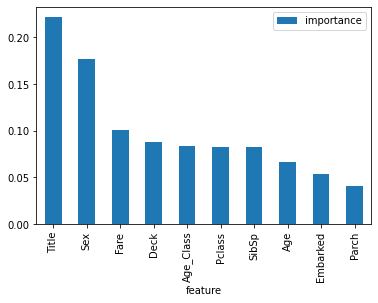

In [179]:
importances.plot.bar()

In [180]:
#data  = data.drop("Embarked", axis=1)
#datatest  = datatest.drop("Embarked", axis=1)

data  = data.drop("Parch", axis=1)
datatest  = datatest.drop("Parch", axis=1)

In [181]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

print(round(acc_random_forest,2,), "%")

92.37 %


In [182]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.15 %


In [183]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 83.61 %


In [184]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[491,  58],
       [102, 240]])

In [185]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8053691275167785
Recall: 0.7017543859649122


In [186]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.75

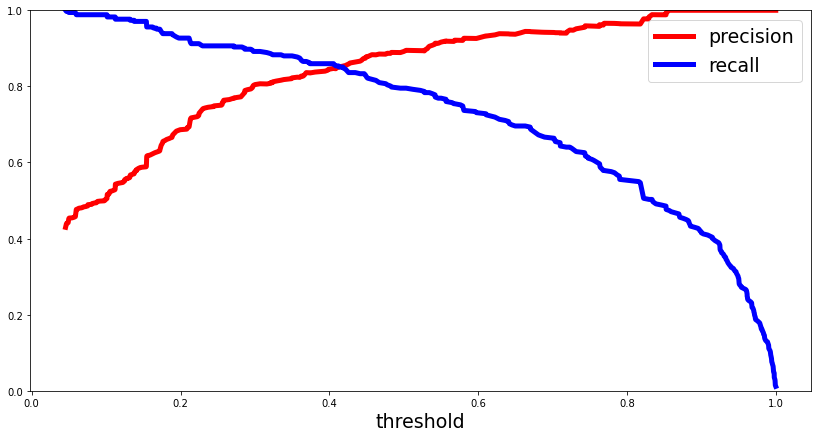

In [187]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

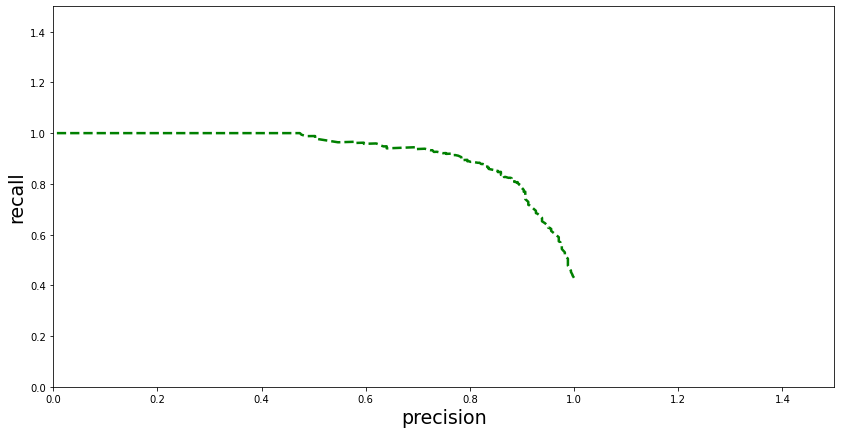

In [188]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

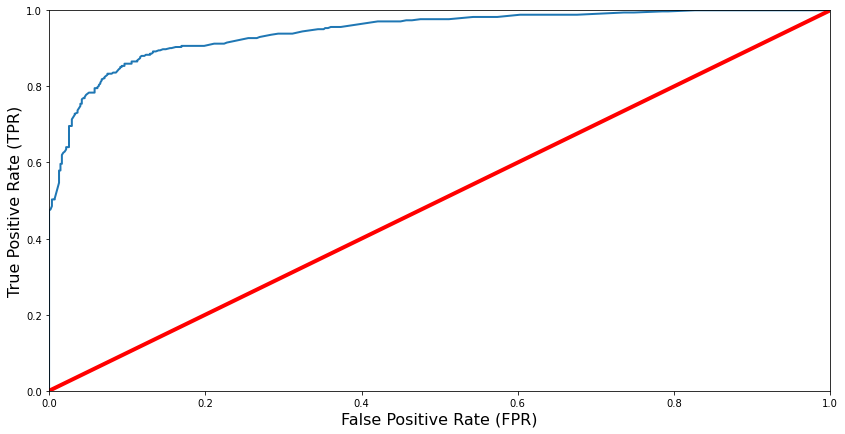

In [189]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [190]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9440769501166395


In [191]:
submit = pd.DataFrame(Y_prediction, columns=['Survived']).to_csv('submission3.csv')